# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [44]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [45]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                diferencia = Y_train[i] - prediction
                # MSE
                error = diferencia ** 2
                train_error_acum += error # Aquí se acumula el error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_acum = train_error_acum / X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)


            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)

                diferencia = Y_validation[i] - prediction
                error = diferencia ** 2
                train_error_acum += error # Aquí se acumula el error

            # Calcular el error promedio de validación por epoch
            val_error_acum = val_error_acum / X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)


            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [46]:
X_train

array([[0, 0],
       [0, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 0],
       [0, 0]])

In [47]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 1000
N_inputs = 2
train_size = 0.8
N_validation = int((1 - train_size) * N_samples)

X_train = np.random.randint(0, 2, (N_samples, N_inputs))
Y_train = np.prod(X_train, axis=1)

X_validation = X_train[-N_validation:]
Y_validation = Y_train[-N_validation:]

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])

X_data (first 5 samples):
[[0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]]
Y_data (first 5 samples):
[0 0 0 0 1]


In [48]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

In [49]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [1 1]
Probabilidad: 0.7722280414455953
Prediction: 1


In [50]:
# Obtenemos un overview de como funciona el modelo sin entrenar de forma aleatoria
predictions = []

## itera por cada muestra de validación y genera la matriz de confusion
for i in tqdm(range(X_validation.shape[0])):
    inputs = X_validation[i]
    prob = perceptron_and.predict(inputs)
    predictions.append((prob>th).astype('int'))

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

100%|██████████| 199/199 [00:00<00:00, 32486.14it/s]

Matriz de Confusión:
[[  0 144]
 [  0  55]]


epoch: 0 | train error: 11.048762347693694 | val error: 0.0
epoch: 10 | train error: 0.3434677023880844 | val error: 0.0
epoch: 20 | train error: 0.10110208513676083 | val error: 0.0
epoch: 30 | train error: 0.04735788749264408 | val error: 0.0
epoch: 40 | train error: 0.027311688577585556 | val error: 0.0
epoch: 50 | train error: 0.017730387704546897 | val error: 0.0
epoch: 60 | train error: 0.012425159400253604 | val error: 0.0
epoch: 70 | train error: 0.00918574869856595 | val error: 0.0
epoch: 80 | train error: 0.007064569211962444 | val error: 0.0
epoch: 90 | train error: 0.0056007908854474224 | val error: 0.0


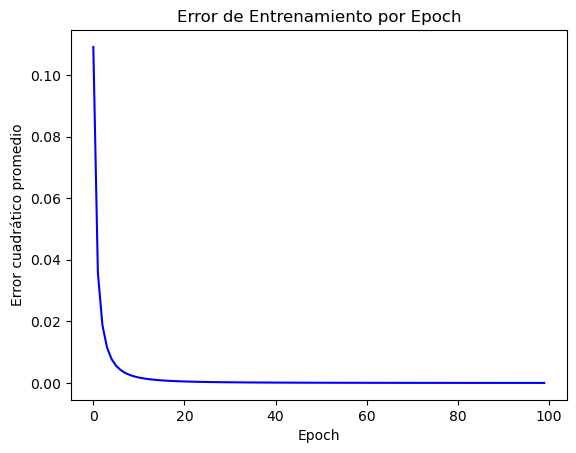

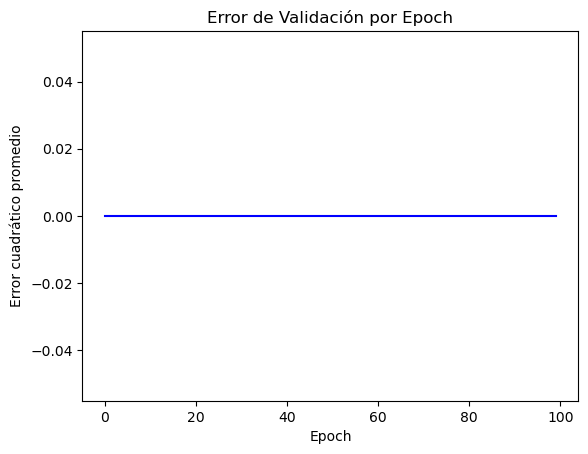

In [51]:


# Train the perceptron
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [52]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [1 1]
Probabilidad: 0.9926497327087201
Prediction: 1


In [53]:
# Evaluamos cómo funciona el modelo en el set de validación

## itera por cada muestra de validación guardando las predicciones en una lista y genera la matriz de confusion

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[  0 144]
 [  0  55]]


In [54]:
# Evaluamos cómo funciona el modelo en el set de test

## Generar el set de test (de forma similar al de validación)
predictions = []

## itera por cada muestra de test guardando las predicciones en una lista y genera la matriz de confusion
for i in tqdm(range(X_test.shape[0])):
    inputs = X_test[i]
    prob = perceptron_and.predict(inputs)
    predictions.append((prob>th).astype('int'))

## Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_test, predictions)

## Visualiza la matriz de confusión
print(f"Matriz de Confusión:{conf_matrix}")


100%|██████████| 1000/1000 [00:00<00:00, 43587.60it/s]

Matriz de Confusión:[[747   0]
 [  0 253]]
